In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
energy_dataset = pd.read_csv('C:/Users/Dell/Desktop/Appliances-energy-prediction-data-master/energydata_complete.csv')

In [3]:
energy_dataset.rename(columns={'T1':'TempKitchen','RH_1':'HumKitchen','T2':'TempLivingRoom','RH_2':'HumLivingRoom',
                   'T3':'TempLaundryRoom','RH_3':'HumLaundryRoom','T4':'TempOfficeRoom','RH_4':'HumOfficeRoom',
                   'T5':'TempBathRoom','RH_5':'HumBathRoom','T6':'TempOutsideNorth','RH_6':'HumOutsideNorth',
                   'T7':'TempIroningRoom','RH_7':'HumIroningRoom','T8':'TempTeenagerRoom','RH_8':'HumTeenagerRoom',
                   'T9':'TempParentRoom','RH_9':'_HumParentRoom','T_out':'TempOutside','Press_mm_hg':'Pressure',
                   'RH_out':'Humidity'},inplace=True)

In [4]:
X1 = energy_dataset[['lights', 'TempKitchen', 'HumKitchen', 'TempLivingRoom',
      'HumLivingRoom', 'TempLaundryRoom', 'HumLaundryRoom', 'TempOfficeRoom',
      'HumOfficeRoom', 'TempBathRoom', 'HumBathRoom',
      'HumOutsideNorth', 'TempIroningRoom', 'HumIroningRoom',
      'TempTeenagerRoom', 'HumTeenagerRoom', 'TempParentRoom',
      'Pressure', 'Humidity', 'Windspeed',
      'Tdewpoint']]

In [5]:
y1 = (energy_dataset['Appliances'])

### Training and Testing set

In [6]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Cross Validation 

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
accuracies = cross_val_score(RandomForestRegressor(), X=X_train, y=y_train,cv=5)
accuracies.mean()

0.44534862226049848

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
accuracies = cross_val_score(RandomForestRegressor(), X=X_test, y=y_test,cv=5)
accuracies.mean()

0.16950705298957833

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
accuracies = cross_val_score(LinearRegression(), X=X_train, y=y_train,cv=5)
accuracies.mean()

0.15912769744406138

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
accuracies = cross_val_score(LinearRegression(), X=X_test, y=y_test,cv=5)
accuracies.mean()

0.14054879949177215

### Bais Variance Trade-off

<module 'matplotlib.pyplot' from 'C:\\Users\\Dell\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

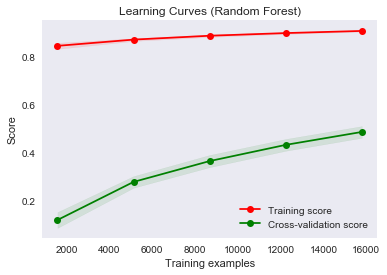

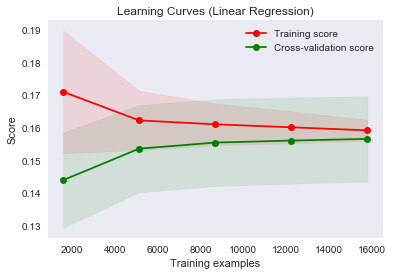

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                       n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
       estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
            label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
            label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = X1, y1


title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestRegressor()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)


title = "Learning Curves (Linear Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

### Regularization

### L2 Regularization

In [14]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_test)

ridgeReg.score(X_test,y_test)


0.13419544476428558

### L1 Regularization

In [15]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.03, normalize=True)
lassoReg.fit(X_train,y_train)

pred = lassoReg.predict(X_test)

lassoReg.score(X_test,y_test)


0.08841298698074751

### Elastic Net

In [17]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(X_train,y_train)

pred_cv = ENreg.predict(X_test)

ENreg.score(X_test,y_test)

0.12994760744888934

In [ ]:
from sklearn.grid_search import GridSearchCV
param_grid = {
   'n_estimators': [200, 700],
   'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)